<a href="https://colab.research.google.com/github/HongWonSeok/hairloss/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%A0%A4%EB%8B%9D_%EC%8B%9C%EC%A6%8C2_LAB_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**모두의 딥러닝 시즌2 with Pytorch - LAB 03**

Hypothesis Function(Linear Regression) -복습-

H(x) = Wx +b로 간단한 1차 함수 모델로 W와 b라는 변수를 학습하여 주어진 데이터를 학습

In [2]:
import torch

W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

#여기서는 최대한 단순한 인공신경망을 써서 gradient descent를 이해하는게 목표이므로 Bias없이 H(x) = Wx를 이용

아래 코드와 같은 입력값 출력값이 있을때는 W=1이 가장 좋은 숫자
이때 cost=0(cost란 모델의 예측값이 실제 데이터와 얼마나 다른지 나타내는 값으로 잘 학습된 데이터 일 수록 낮은 값을 가짐) 그러므로 1과 멀어질 수록 cost가 높아짐

Linear Regression에서 쓰이는 Cost Function은 MSE(Mean Squared Error)라고 함

cost = torch.mean((hyothesis - y_train)**2)

In [ ]:
x_train = torch.FloatTensor([[1],[2],[3]]) #입력 값
y_train = torch.FloatTensor([[1],[2],[3]]) #출력 값

**Gradient Descent**

아래 사진에 보이는 것과 같이 W는 1을 기준으로 곡선모양을 띄고 있다. 곡선의 기울기가 클수록 1과 더 멀리 있다는 것을 나타낸다. 이 기울기를 Gradient라고 부른다.

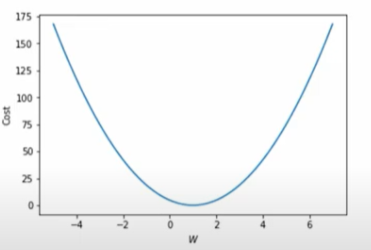 사진출처(https://www.youtube.com/watch?v=sVUbNEM9Ap0&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=5) 

우리가 궁극적으로 원하는 것은 cost를 줄이는 것이다. 그러기 위해서는 Gradient(기울기)를 줄이는 방법이 있다.

아래의 코드는 Grdient Descent에 대한 코드이다.

gradient = 2*torch.mean((W*x_train - ytrain) * x_train)

lr = 0.1

W -= lr *gradient

**FULL CODE** 

Gradient Descent를 하는 동작을 10번 반복하는 과정에서 점점 W가 1에 수렴하고 Cost값이 줄어드는 것을 볼 수 있다.

In [10]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1)
# Learning rate 설정
lr = 0.1

nb_epochs =10
for epoch in range(nb_epochs +1):

  # H(x)계산
  hypothesis = x_train *W

  # cost gradient 계산
  cost = torch.mean((hypothesis - y_train) **2)
  gradient = torch.sum((W * x_train - y_train) * x_train)

  print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
      epoch, nb_epochs, W.item(), cost.item()))
  
  # cost gradient로 H(x) 개선
  W -= lr *gradient


Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


Pytorch에서는 Gradient Descent를 더 편리하게 할 수 있도록 torch.optim을 제공하고있다.

**이것에 대한 FULL CODE**

In [11]:
import torch.optim as optim

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad = True)
# Learning rate 설정
optimizer = optim.SGD([W],lr=0.15)

nb_epochs =10
for epoch in range(nb_epochs +1):

  # H(x)계산
  hypothesis = x_train *W

  # cost 계산
  cost = torch.mean((hypothesis - y_train) **2)

  print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
      epoch, nb_epochs, W.item(), cost.item()))
  
  # cost로 H(x) 개선
  optimizer.zero_grad() # optimizer의 저장되어있는 모든 학습가능한 함수의 gradient를 0으로 초기화
  cost.backward()       # cost Function을 미분하여 각 변수의 gradient를 계산
  optimizer.step()      # gradeint Descent실행



Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746667
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


이번 LAB-03에서 배운 내용은 이전에 배운 Linear Regression에 대한 Gradient Descent로 Hypothesis의 W와 B를 조정하여 cost를 최소로 낮추기위한 기법을 배운다. cost란 실제 데이터와 모델의 예측값이 얼마나 다른지를 나타내는 것으로 cost가 낮을수록 좋은 모델이라고 할 수 있다. cost를 최소화 하기 위해서는 기울기가 작아야 한다는 것을 알게 되었고, 이 사실로 Gradient Descent라는 것을 수행해야 한다는 것 또한 알게 되었다. Gradient Descent를 하기위해서는 두가지 방법이 있다. 첫번째로는 gradient를 직접 계산하여하는 방법이 있고, 두번째로는 torch에서 제공하는 torch.optim을 이용하는 방법이있다. 두번째 방법은 미분방적식을 직접 계산 할 필요 없이 라이브러리에서 처리해주어 제공한다는 편리한 점이 있다. 둘다 결과는 같은 것으로 나왔다. 근데 그러면 둘중에 더 좋은 것? 더 빠른 것?은 뭘까?
